<a href="https://colab.research.google.com/github/Yashgowda05/Yashu_Crypto-Volatility/blob/main/a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd

df = pd.read_csv("/content/Yahoo_Finance.csv")
df.head()


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2001-01-01,16.5000,16.500000,16.50,16.50,12.229188,0
1,1,2001-01-02,15.9875,16.299999,15.91,16.25,12.043896,1607584
2,2,2001-01-03,15.8775,15.947500,15.50,15.90,11.784488,506560
3,3,2001-01-04,16.1250,16.875000,15.75,16.50,12.229188,894416
4,4,2001-01-05,16.5000,16.500000,16.50,16.50,12.229188,0


In [2]:
df['Date'] = pd.to_datetime(df['Date'])


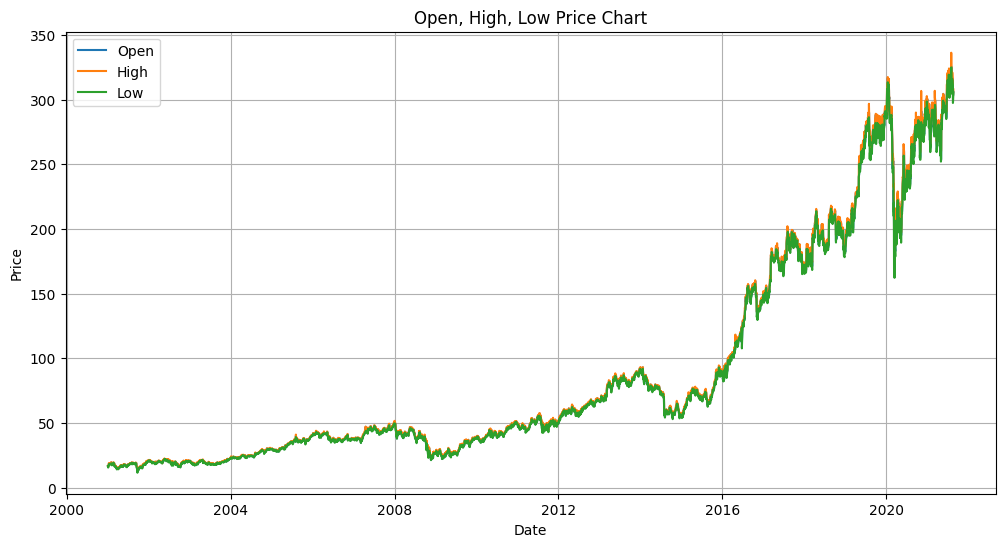

In [4]:
plt.figure(figsize=(12,6))

plt.plot(df["Date"], df["Open"], label="Open")
plt.plot(df["Date"], df["High"], label="High")
plt.plot(df["Date"], df["Low"], label="Low")

plt.title("Open, High, Low Price Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()


In [2]:
!pip install -q requests pandas plotly

import requests
import pandas as pd
import plotly.graph_objs as go
from datetime import datetime

# -------------------------------------
# 1. LIVE PRICE FETCH – 5 COINS
# -------------------------------------
coins = ["bitcoin", "ethereum", "solana", "cardano", "dogecoin"]

url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids": ",".join(coins),
    "vs_currencies": "usd",
    "include_24hr_vol": "true",
    "include_24hr_change": "true"
}

data = requests.get(url, params=params).json()

# -------------------------------------
# 2. FORMAT OUTPUT TABLE (Like Screenshot)
# -------------------------------------
rows = []

for coin in coins:
    price = data[coin]["usd"]
    change = data[coin]["usd_24h_change"]
    volume = data[coin]["usd_24h_vol"]

    rows.append([
        coin.title(),
        f"${price:,.2f}",
        f"{change:.2f}%",
        f"${volume/1_000_000_000:.2f}B"
    ])

df = pd.DataFrame(rows, columns=["Cryptocurrency", "Price (USD)", "24h Change", "Volume (24h)"])

print("🔵 Crypto Data Fetcher (Live)")
print("Last updated:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
display(df)

# -------------------------------------
# 3. 7-DAY TREND DATA (BTC + ETH only)
# -------------------------------------
hist_url = "https://api.coingecko.com/api/v3/coins/{}/market_chart"

trend = {}

for coin in ["bitcoin", "ethereum"]:
    r = requests.get(hist_url.format(coin), params={"vs_currency": "usd", "days": 7}).json()
    trend[coin] = [p[1] for p in r["prices"]]

# -------------------------------------
# 4. PLOTLY GRAPH (Like Screenshot)
# -------------------------------------
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=trend["bitcoin"],
    mode="lines+markers",
    name="BTC"
))

fig.add_trace(go.Scatter(
    y=trend["ethereum"],
    mode="lines+markers",
    name="ETH"
))

fig.update_layout(
    title="7-Day Price Trend",
    xaxis_title="Day",
    yaxis_title="Price (USD)",
    template="plotly_dark",
    height=420
)

fig.show()


🔵 Crypto Data Fetcher (Live)
Last updated: 2025-11-29 14:53:15


,Cryptocurrency,Price (USD),24h Change,Volume (24h)
0,Bitcoin,"$90,689.00",-1.71%,$49.26B
1,Ethereum,"$2,992.14",-2.39%,$15.67B
2,Solana,$136.68,-4.10%,$3.81B
3,Cardano,$0.42,-2.95%,$0.62B
4,Dogecoin,$0.15,-2.55%,$0.88B
